In [1]:
import os, shutil
os.environ['KERAS_BACKEND']='tensorflow'
original_dataset_dir = 'C:/Users/richa/Desktop/cats_dogs/train'    

base_dir = 'C:/Users/richa/Desktop/cats_dogs/cats_and_dogs_small'               
os.mkdir(base_dir)                                          #create a base folder to save the data we want below  

train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)                                         #create a train folder under base folder
validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir)                                                    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]     #extract the data from original data                
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]              
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)   

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 35s 351ms/step - loss: 0.6896 - acc: 0.5235 - val_loss: 0.6731 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 28s 284ms/step - loss: 0.6583 - acc: 0.6100 - val_loss: 0.6688 - val_acc: 0.5690
Epoch 3/30
100/100 [==============================] - 28s 284ms/step - loss: 0.6269 - acc: 0.6530 - val_loss: 0.6084 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5770 - acc: 0.7090 - val_loss: 0.6908 - val_acc: 0.5950
Epoch 5/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5394 - acc: 0.7180 - val_loss: 0.5758 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5058 - acc: 0.7510 - val_loss: 0.6492 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 30s 296ms/step - loss: 0.4828 - acc: 0.7720 - val_loss: 0.53

In [13]:
model.save('cats_and_dogs_small_1.h5')

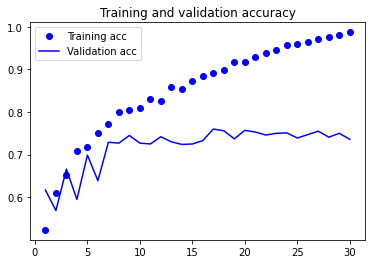

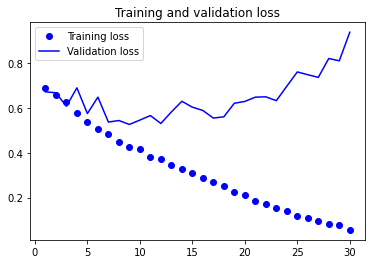

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
#using "data augementation"
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

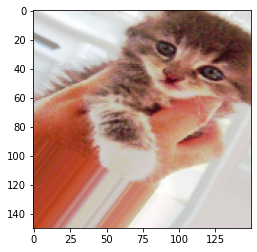

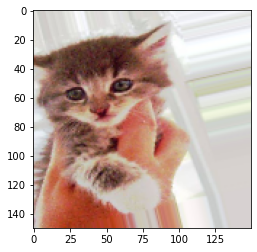

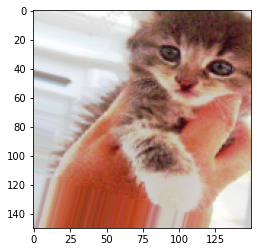

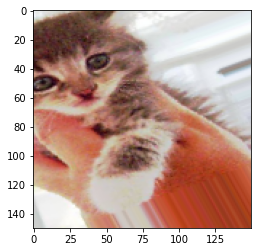

In [26]:
#displaying augmented training images
from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)           #convert to numpy array with shape(150 ,150, 3)                          
x = x.reshape((1,) + x.shape)         #reshape it to (1, 150, 150, 3)                          
#Generates batches of randomly transformed.
i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break              #loops indefinitely, so need to break                                      

plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size = (150, 150),                                 
        batch_size = 20,
        class_mode = 'binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs = 100,
      validation_data = validation_generator,
      validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6840 - acc: 0.5540 - val_loss: 0.6647 - val_acc: 0.5970
Epoch 2/100
100/100 [==============================] - 31s 305ms/step - loss: 0.6704 - acc: 0.5745 - val_loss: 0.6743 - val_acc: 0.5630
Epoch 3/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6607 - acc: 0.5930 - val_loss: 0.6316 - val_acc: 0.6190
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6479 - acc: 0.6115 - val_loss: 0.6361 - val_acc: 0.6350
Epoch 5/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6304 - acc: 0.6505 - val_loss: 0.6061 - val_acc: 0.6780
Epoch 6/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6158 - acc: 0.6460 - val_loss: 0.5949 - val_acc: 0.6780
Epoch 7/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6011 - acc: 0.6755 -

In [30]:
model.save('cats_and_dogs_small_2.h5')

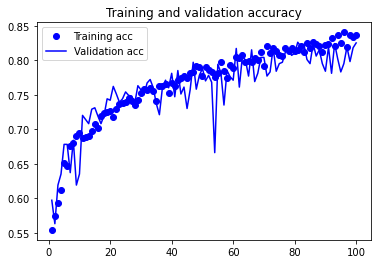

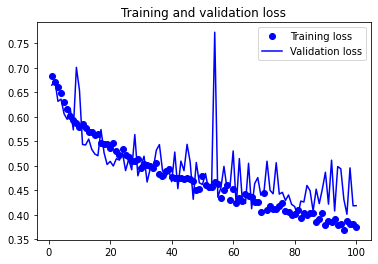

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()